In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
labels_file = open('./data/train.txt', 'r')
labels = [float(line) for line in labels_file]

In [10]:
vid = cv2.VideoCapture('./data/train.mp4')

rows, cols, channels = 480, 640, 3
frame = np.zeros((rows, cols, channels)).astype('uint8')
# src_color = []
src = []
max_frames = 
nframes = 0
# while(i < 10):
while(1):
    # Capture frame-by-frame
    try:
        ret, frame[:] = vid.read()
        nframes += 1
    except:
        break

    # Our operations on the frame come here
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
#     src_color.append(frame)
#     src.append(gray.astype('float')/255.0)
    

print(nframes)

20400


In [ ]:
vid = cv2.VideoCapture('./data/train.mp4')

rows, cols, channels = 480, 640, 3
grays = np.memmap('gray_frames.npy', dtype=np.float32,
              mode='w+', shape=(rows, cols, nframes))
print(grays.shape)
idx = 0
while(1):
    # Capture frame-by-frame
    try:
        ret, frame[:] = vid.read()
        grays[:, :, idx] = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY).astype('float')/255.0
        idx += 1
    except:
        break




In [5]:
fw = 4.

thresh = 20.0/255.0

diff = []
dvs = []
refs = []
ref = src[0].copy()
for i in range(1, len(src)):
    d = src[i] - ref
    td = d * (np.abs(d) > thresh)
    ref += td
    
    diff.append(d)
    dvs.append(td)
    refs.append(ref.copy())
    
    

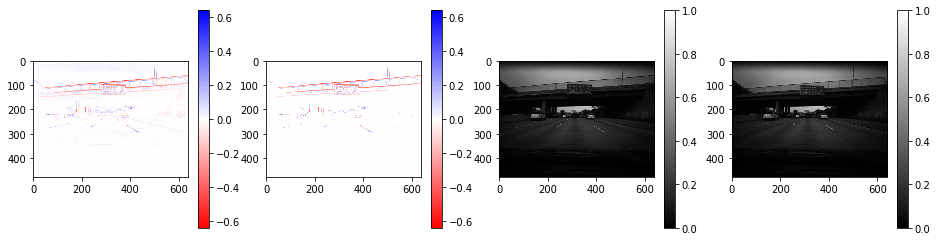

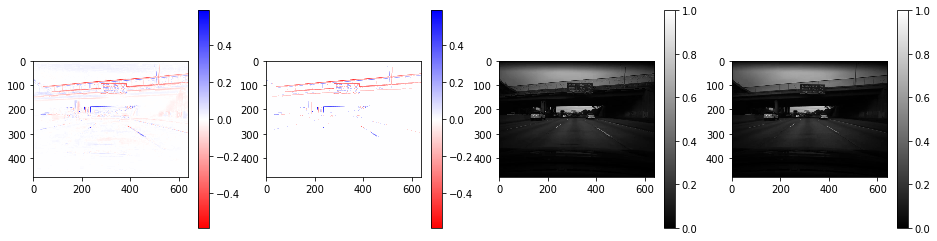

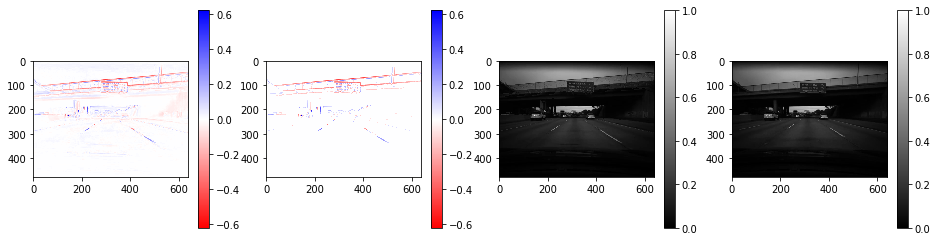

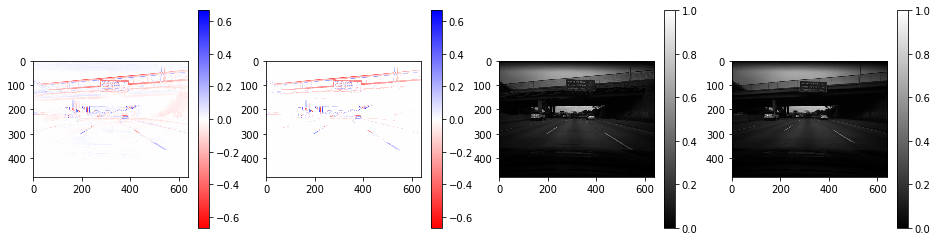

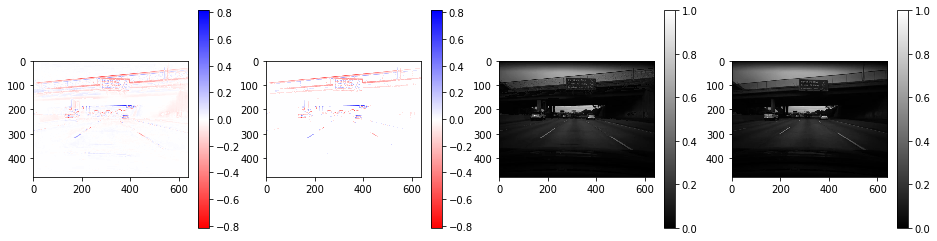

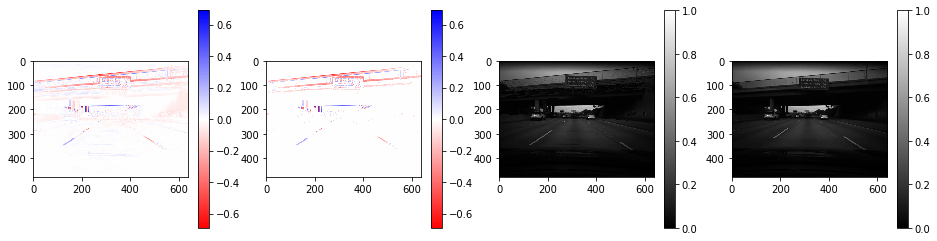

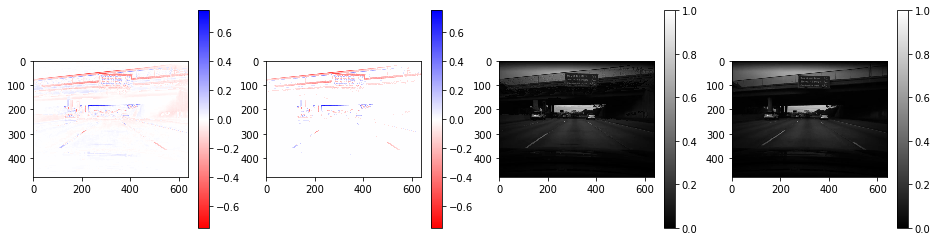

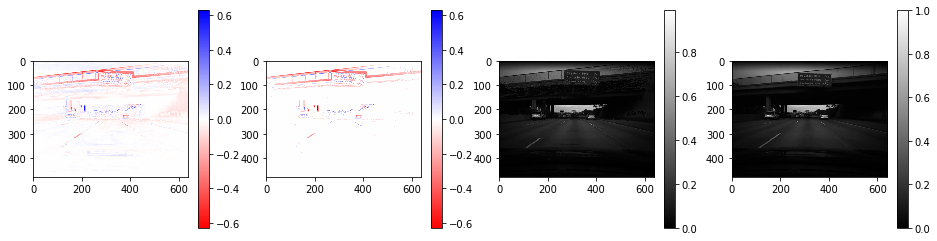

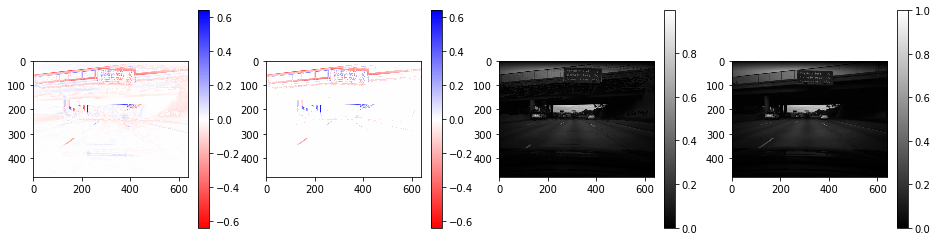

In [7]:
for i in range(len(diff)):
    fig = plt.figure(figsize=(4*fw, fw))
    ax = plt.subplot(1, 4, 1)
    im = plt.imshow(diff[i], cmap='bwr_r', 
                   vmin=-np.abs(diff[i]).max(),
                   vmax=np.abs(diff[i]).max())
    plt.colorbar(im)

    ax = plt.subplot(1, 4, 2)
    im = plt.imshow(dvs[i], cmap='bwr_r',
                   vmin=-np.abs(dvs[i]).max(),
                   vmax=np.abs(dvs[i]).max())
    plt.colorbar(im)

    ax = plt.subplot(1, 4, 3)
    im = plt.imshow(refs[i], cmap='gray')
    plt.colorbar(im)

    ax = plt.subplot(1, 4, 4)
    im = plt.imshow(src[i], cmap='gray')
    plt.colorbar(im)

plt.show()


28.105569


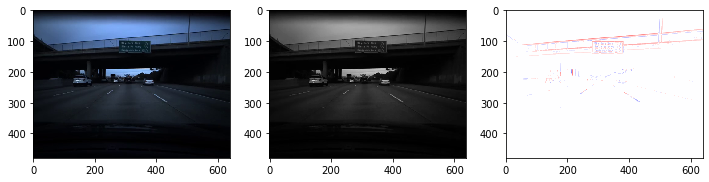

28.105569


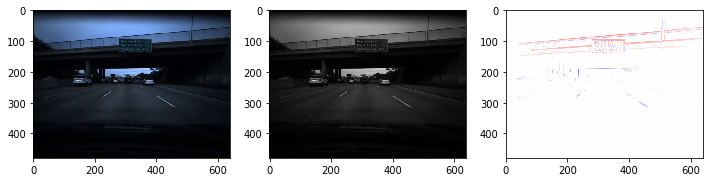

28.106527


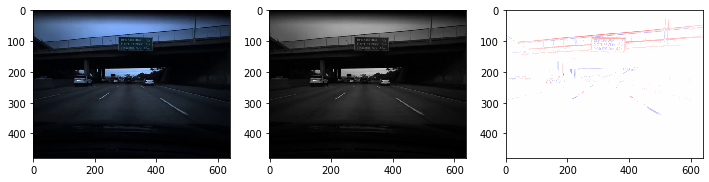

28.130404


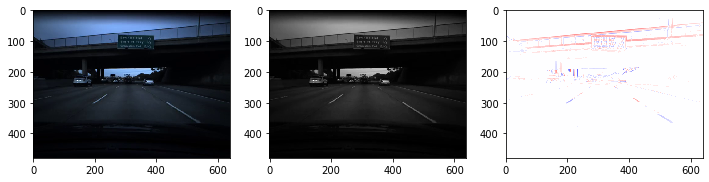

28.109243


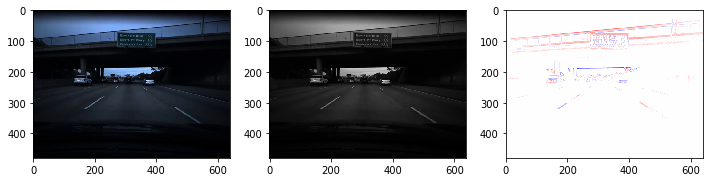

28.088572


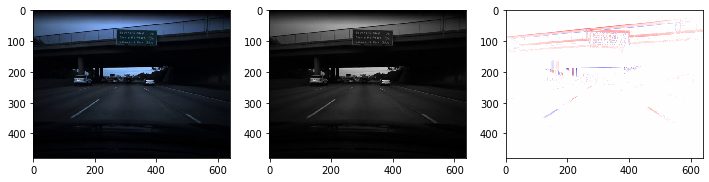

28.034211


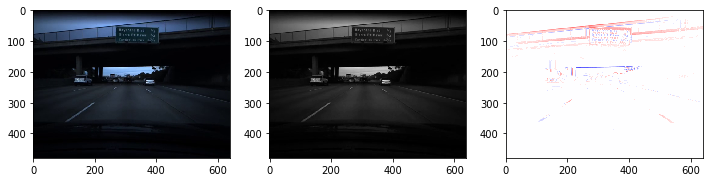

28.018491


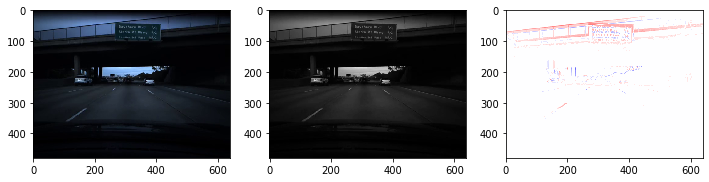

27.986624


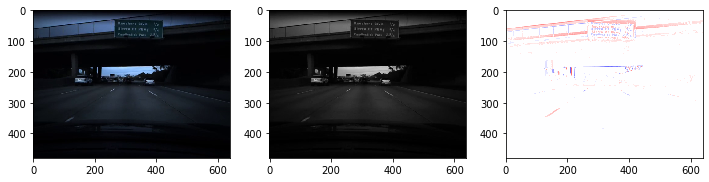

28.016352


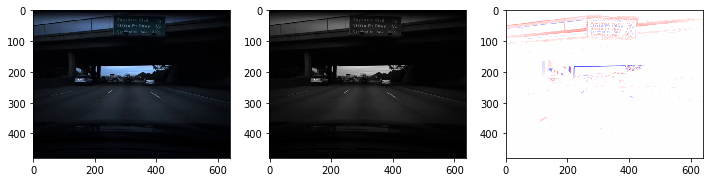

In [5]:
import glob
files = sorted(glob.glob("./train/data_*.npz"))
fw = 4.0
for f in files[:10]:
    data = np.load(f)
    gray = data['gray']
    dvs = data['dvs']
    color = data['color']
    label = data['label']
    print(label)
    plt.figure(figsize=(fw*3, fw))
    ax = plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(color, cv2.COLOR_BGR2RGB))

    ax = plt.subplot(1, 3, 2)
    plt.imshow(gray, cmap='gray', 
               vmin=0.0,
               vmax=1.0,
               )

    ax = plt.subplot(1, 3, 3)
    plt.imshow(dvs, cmap='bwr_r',
               vmin=-1.0,
               vmax=1.0,
              )

    plt.show()